## Exam 02 -  Spring 2021

**Cole**

**DSCI 35600 - Machine Learning**

## Part 1A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Use `pandas` to load the contents of the tab-separated file `Salaries.txt` into a dataframe called `df`. Display the first 10 rows of this dataframe.

In [60]:
df = pd.read_csv('Salaries.txt', sep='\t')
df.head(200)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
195,AssocProf,B,9,7,Male,113600
196,AsstProf,B,4,4,Male,92700
197,AsstProf,B,4,4,Male,92000
198,Prof,B,34,33,Male,189409


**Your goal in this assignment will be to use features: discipline, yrs.since.phd, yrs.service, sex, salary to predict the value of the following label y: rank.**

## Part 1B: Preparing the Data   (10 points)

In the cell below, create the following arrays:

* `X_num` should contain the columns of `df` associated with numerical variables. 
* `X_cat` should contain the columns of `df` associated with categorical variables. 
* `y` should be a 1D array contain the values of the label, `y`. 

Print the shapes of these three arrays.

In [61]:
X_num = df.iloc[:, [2,3,5]].values
X_cat = df.iloc[:, [1,4]].values.astype('str')
y = df.iloc[:, -1].values

print(X_num.shape)
print(X_cat.shape)
print(y.shape)

(397, 3)
(397, 2)
(397,)


#### Numerical Features
Split `Xnum` into training and validation sets called `X_num_train` and `X_num_val`. Use an 80/20 split, and set `random_state=1`. 

Then use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `X_sca_train` and `X_sca_val`. Print the shape of these two arrays. 

In [62]:
X_num_train, X_num_val, y_train, y_val = train_test_split (X_num, y, test_size = 0.2, random_state=1)
scaler = StandardScaler()
scaler.fit(X_num_train)

X_sca_train = scaler.transform(X_num_train)
X_sca_val = scaler.transform(X_num_val)

print(X_sca_train.shape)
print(X_sca_val.shape)

(317, 3)
(80, 3)


#### Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `X_enc`. 

Split `X_enc` into training and validation sets called `X_enc_train` and `X_enc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of these two arrays.

In [63]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

X_enc_train, X_enc_val, y_train, y_val = train_test_split(X_enc, y, test_size = 0.2, random_state=1)

print(X_enc_train.shape)
print(X_enc_val.shape)

(317, 4)
(80, 4)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `X_sca_train` and `X_enc_train` into an array called `X_train`. Then combine `X_sca_val` and `X_enc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [64]:
X_train = np.hstack([X_sca_train, X_enc_train])
X_val = np.hstack([X_sca_val, X_enc_val])

print(X_train.shape)
print(X_val.shape)

(317, 7)
(80, 7)


## Part 1C: Logistic Regression Model   (10 points)

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 100 models with `C=10**k`, where `k` ranges from -3 to 3. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `k`. Display a legend for your plot. 

Set `solver='lbfgs'` and `multi_class='ovr'` when creating your logistic regression models. 

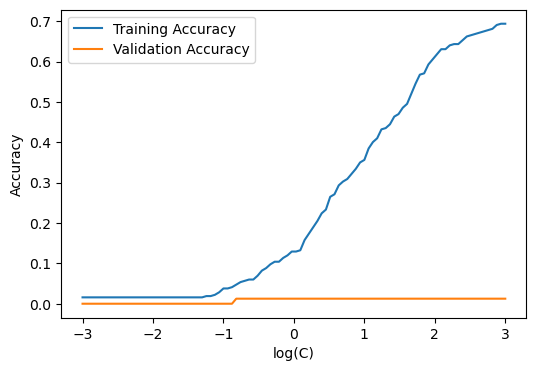

In [65]:
tr_acc = []
va_acc = []

exp_list = np.linspace(-3, 3, 100)

for k in exp_list:
    temp_model = LogisticRegression(solver='lbfgs', C=10**k, multi_class='ovr')
    temp_model.fit(X_train, y_train)
    tr_acc.append(temp_model.score(X_train, y_train))
    va_acc.append(temp_model.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, va_acc, label='Validation Accuracy')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result.

In [66]:
idx = np.argmax(va_acc)
best_logC = exp_list[idx]
print(best_logC)

-0.8181818181818183


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [67]:
mod_01 = LogisticRegression(solver='lbfgs', C=10**best_logC, multi_class='ovr')
mod_01.fit(X_train, y_train)

print('Training Accuracy:  ', mod_01.score(X_train, y_train))
print('Validation Accuracy:', mod_01.score(X_val, y_val))

Training Accuracy:   0.0473186119873817
Validation Accuracy: 0.0125


## Part 1D: Decision Tree Model  (10 points)

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. For each model, log the training and validation accuracies in separate lists, and then plot these lists against the max depth. Display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

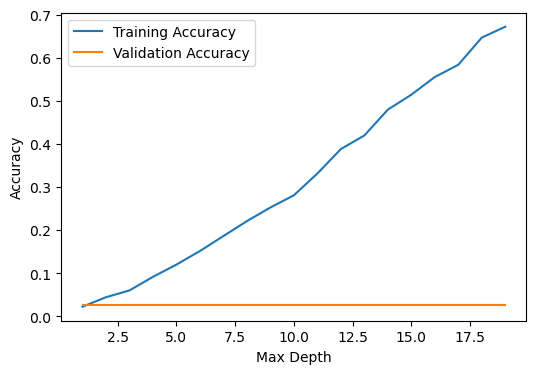

In [68]:
tr_acc = []
va_acc = []
max_depth_list = range(1,20)

for md in max_depth_list:
    np.random.seed(1)
    temp_mod = DecisionTreeClassifier(max_depth=md)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(max_depth_list, tr_acc, label='Training Accuracy')
plt.plot(max_depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [69]:
idx = np.argmax(va_acc)
best_depth = max_depth_list[idx]
print(best_depth)

1


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [70]:
np.random.seed(1)
mod_03 = DecisionTreeClassifier(max_leaf_nodes=best_depth)
mod_03.fit(X_train, y_train)

print('Training Accuracy:  ', mod_03.score(X_train, y_train))
print('Validation Accuracy:', mod_03.score(X_val, y_val))

ValueError: max_leaf_nodes 1 must be either None or larger than 1

## Part 1E: Random Forest Model (10 points)

In the cell below, create and fit several random forest models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. Set `n_estimators=200` for each model. After training each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

In [ ]:
tr_acc = []
va_acc = []
depth_list = range(1,20)

for d in depth_list:
    np.random.seed(1)
    temp_mod = RandomForestClassifier(n_estimators=200, max_depth=d,   
                                bootstrap='True', oob_score=True)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [ ]:
idx = np.argmax(va_acc)
best_d = depth_list[idx]
print(best_d)

Create a random forest model using the previously determined value of `max_depth` and `n_estimators=200`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [ ]:
np.random.seed(1)
mod_04 = RandomForestClassifier(n_estimators=200, max_depth=best_d,  
                                bootstrap='True', oob_score=True)
mod_04.fit(X_train, y_train)

print('Out of bag score:', mod_04.oob_score_)

print('Training Accuracy:  ', mod_04.score(X_train, y_train))
print('Validation Accuracy:', mod_04.score(X_val, y_val))